# Basic of Cluster Analysis

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load data

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

# Display data
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Map the data

In [3]:
# Create a new data map for languages
data_mapped = data.copy()

# Assign variables to the languages
data_mapped['Language'] = data_mapped['Language'].map({'English':0, 'French':1, 'German': 2})

# Display result
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Select features

In [4]:
# Dataframe parameters
x = data_mapped.iloc[:,1:4]

# Display data
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [5]:
# Produce clusters

# KMeans(number of cluster would like to produce)
kmeans = KMeans(2)

In [6]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [7]:
# Find predict clusters

# sklearn.cluster.KMeans.fit_predict(x) retunr the number of cluster predictions in an array
identified_clusters = kmeans.fit_predict(x)

# Display data
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [8]:
# Create data frame to verify the clsuters
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


<function matplotlib.pyplot.show(close=None, block=None)>

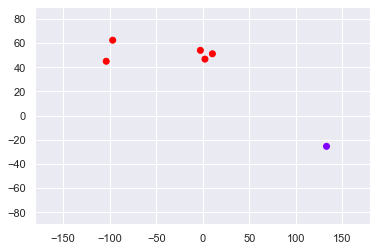

In [9]:
# Create Scatter with Clusters

# Plot data for scatterplot
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Clusters'],cmap='rainbow')

# Axis for the domain for x and y
plt.xlim(-180,180)
plt.ylim(-90,90)

# Display Scatter
plt.show

## Selecting the number of clusters

##  WCSS

In [10]:
# Plot the elbow(or better clustter)
kmeans.inertia_

13208.958119999996

In [11]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\serch\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

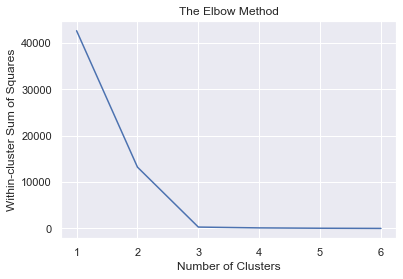

In [13]:
# Range number of clusters
number_cluster = range(1,7)

# Elbow Chart
plt.plot(number_cluster, wcss)

# Title
plt.title('The Elbow Method')

# Title parameters X and Y
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')